<a href="https://colab.research.google.com/github/Jiayiwangjessie/ISOM-730/blob/master/Jiayi_Wang_AirPollution_SQL%26Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
import sqlite3

conn = sqlite3.connect('AirPollutionDB.db')  
c = conn.cursor() 

# Create table - 
c.execute('''CREATE TABLE Measurement
             ([Measurement_date] DATETIME,[Station_code] integer, [SO2] REAL, [NO2] REAL, [O3] REAL, [CO] REAL,[PM10] integer,[PM2.5] integer)''')
c.execute('''CREATE TABLE Measurement_info
             ([Measurement_date] DATETIME,[Station_code] integer, [Item_code] integer, [Average_value] REAL, [Instrument_status] integer)''')
c.execute('''CREATE TABLE Measurement_item_info
             ([Item_code] integer primary key, [Item_name] text, [Unit_of_measurement] text, [Good] REAL, [Normal] REAL, [Bad] REAL,[Very bad] REAL)''')
c.execute('''CREATE TABLE Measurement_station_info
             ([Station_code] integer primary key, [Station_name] text, [Address] text, [Latitude] REAL, [Longitude] REAL)''')
conn.commit()

In [0]:
import sqlite3
import pandas as pd
from pandas import DataFrame

conn = sqlite3.connect('AirPollutionDB.db')  
c = conn.cursor()

In [0]:
read_measurement=pd.read_csv('Measurement.csv')
read_measurement.to_sql('Measurement', conn, if_exists='append', index = False)

In [0]:
read_measurement=pd.read_csv('Measurement_info.csv')
read_measurement.to_sql('Measurement_info', conn, if_exists='append', index = False)

In [0]:
read_measurement=pd.read_csv('Measurement_item_info.csv')
read_measurement.to_sql('Measurement_item_info', conn, if_exists='append', index = False)

/Users/jiayiwang/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [0]:
read_measurement=pd.read_csv('Measurement_station_info.csv')
read_measurement.to_sql('Measurement_station_info', conn, if_exists='append', index = False)

In [0]:
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,Measurement,Measurement,2,CREATE TABLE Measurement\n ([Measu...
1,table,Measurement_info,Measurement_info,3,CREATE TABLE Measurement_info\n ([...
2,table,Measurement_item_info,Measurement_item_info,4,CREATE TABLE Measurement_item_info\n ...
3,table,Measurement_station_info,Measurement_station_info,5,CREATE TABLE Measurement_station_info\n ...


In [0]:
measurement = pd.read_sql("""SELECT *
                              FROM Measurement;""", conn)
measurement.head()

,Measurement_date,Station_code,SO2,NO2,O3,CO,PM10,PM2.5
0,1/1/17 0:00,101,0.004,0.059,0.002,1.2,73,57
1,1/1/17 1:00,101,0.004,0.058,0.002,1.2,71,59
2,1/1/17 2:00,101,0.004,0.056,0.002,1.2,70,59
3,1/1/17 3:00,101,0.004,0.056,0.002,1.2,70,58
4,1/1/17 4:00,101,0.003,0.051,0.002,1.2,69,61


In [0]:
measurement_i=pd.read_sql("""SELECT *
                              FROM Measurement_info;""", conn)
measurement_i.head()

,Measurement_date,Station_code,Item_code,Average_value,Instrument_status
0,1/1/17 0:00,101,1,0.004,0
1,1/1/17 0:00,101,3,0.059,0
2,1/1/17 0:00,101,5,1.200,0
3,1/1/17 0:00,101,6,0.002,0
4,1/1/17 0:00,101,8,73.000,0


In [0]:
measurement_i_i=pd.read_sql("""SELECT *
                              FROM Measurement_item_info;""", conn)
measurement_i_i.head()

,Item_code,Item_name,Unit_of_measurement,Good,Normal,Bad,Very bad
0,1,SO2,ppm,0.02,0.05,0.15,1.0
1,3,NO2,ppm,0.03,0.06,0.20,2.0
2,5,CO,ppm,2.00,9.00,15.00,50.0
3,6,O3,ppm,0.03,0.09,0.15,0.5
4,8,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0


In [0]:
measurement_s_i=pd.read_sql("""SELECT *
                               FROM Measurement_station_info;""", conn)
measurement_s_i.head()

,Station_code,Station_name,Address,Latitude,Longitude
0,101,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007
1,102,Jung-gu,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676
2,103,Yongsan-gu,"136, Hannam-daero, Yongsan-gu, Seoul, Republic...",37.540033,127.004850
3,104,Eunpyeong-gu,"215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...",37.609823,126.934848
4,105,Seodaemun-gu,"32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...",37.593742,126.949679


In [0]:
s = pd.read_sql("""SELECT Station_code, Station_name
                               FROM Measurement_station_info;""", conn)

s.head()

,Station_code,Station_name
0,101,Jongno-gu
1,102,Jung-gu
2,103,Yongsan-gu
3,104,Eunpyeong-gu
4,105,Seodaemun-gu


In [0]:
measurement.isnull().sum()

Measurement_date    0
Station_code        0
SO2                 0
NO2                 0
O3                  0
CO                  0
PM10                0
PM2.5               0
dtype: int64

In [0]:
measurement[['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']].describe()

,SO2,NO2,O3,CO,PM10,PM2.5
count,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000
mean,-0.001795,0.022519,0.017979,0.509197,43.708051,25.411995
std,0.078832,0.115153,0.099308,0.405319,71.137342,43.924595
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.003000,0.016000,0.008000,0.300000,22.000000,11.000000
50%,0.004000,0.025000,0.021000,0.500000,35.000000,19.000000
75%,0.005000,0.038000,0.034000,0.600000,53.000000,31.000000
max,3.736000,38.445000,33.600000,71.700000,3586.000000,6256.000000


In [0]:
import seaborn as sns

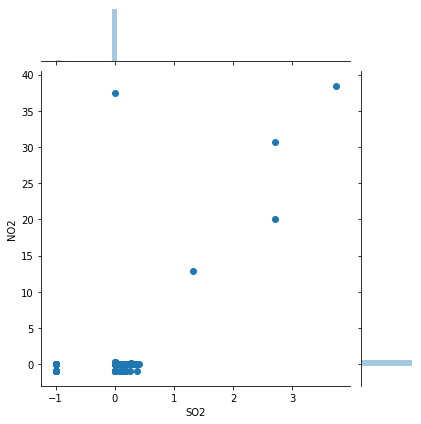

In [0]:
sns.jointplot(measurement['SO2'],measurement['NO2'])

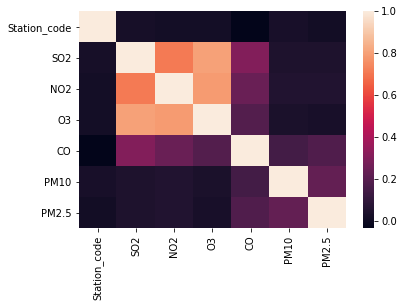

In [0]:
corrMatrix=measurement.corr()
sns.heatmap(corrMatrix)

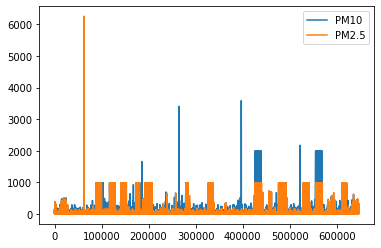

In [0]:
measurement[['PM10','PM2.5']].plot()

In [0]:
print("We have", measurement['SO2'].loc[(measurement['SO2']<0)].count(),"negative values for SO2")
print("We have", measurement['NO2'].loc[(measurement['NO2']<0)].count(),"negative values for NO2")
print("We have", measurement['O3'].loc[(measurement['O3']<0)].count(),"negative values for O3")
print("We have", measurement['CO'].loc[(measurement['CO']<0)].count(),"negative values for CO")
print("We have", measurement['PM10'].loc[(measurement['PM10']<0)].count(),"negative values for PM10")
print("We have", measurement['PM2.5'].loc[(measurement['PM2.5']<0)].count(),"negative values for PM2.5")

We have 3976 negative values for SO2
We have 3834 negative values for NO2
We have 4059 negative values for O3
We have 4036 negative values for CO
We have 3962 negative values for PM10
We have 3973 negative values for PM2.5
